In [48]:
#Matplotlib Homework - The Power of Plots
#Observations and Insights 
#First of all, to confirm the total number of total mice, I looked to see of there were any duplicate mice by 
#Mouse ID Number that showed up for Mouse ID and Timepoint, which revealed there are only 248 mice.
#A Bar chart types were used to visualize the data on total number of unique mice tested on each drug regimen 
#using pandas and pyplot. From the selected treatments Capomulin (230 mice) and Ramicane (228) were the most 
#tested; Propriva being the least tested drug treatment (148).
#The Pie chart was used to present data on the distribution of female (49.6%) versus male (50.4%) mice.
#The only drug regiment that had potential outlier was Infubinol which was 36.32.
#The correlation between mouse weight and average tumor volume is 0.95 which shows a strong positive correlation:
#when the mouse weight increases the average tumor volume also increases.
#The R-squared value is 0.90 which measures the closeness of the data to the fitted regression line. 
#90%  indicates that there are smaller differences between the observed data, and the fitted value.
# From the 4 selected treatments Capomulin and Ramicane showed promising signs of reducing the size of tumors more effectively.


In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results,  on = "Mouse ID")
merge_df.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
mice=merge_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_mouse_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

In [8]:
##Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_var = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_stdev = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

In [10]:
# Assemble the resulting series into a single summary dataframe.
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_var, "Standard Deviation": regimen_stdev, "SEM": regimen_sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_line_data=clean_mouse_df.groupby('Drug Regimen')
agg_summary_stats_table=single_line_data.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
agg_summary_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
##Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# first, we will find total number of mice per drug regimen
mice_regimen = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

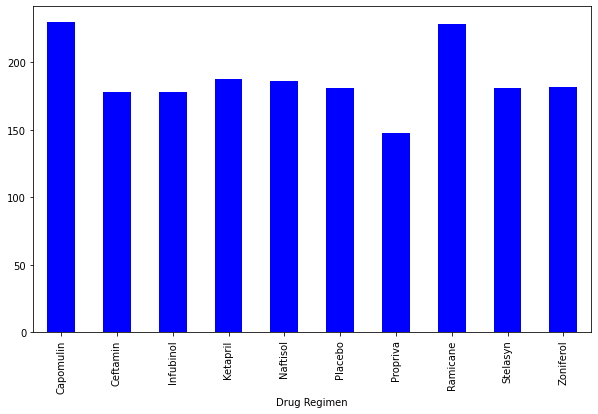

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_regimen.plot(kind="bar", color='b', figsize=(10,6))

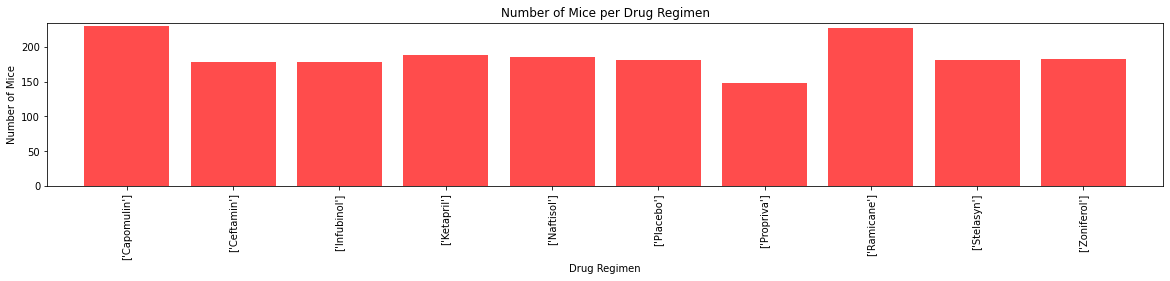

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_list=[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
drugs=['Capomulin'], ['Ceftamin'], ['Infubinol'], ['Ketapril'], ['Naftisol'], ['Placebo'], ['Propriva'], ['Ramicane'], ['Stelasyn'], ['Zoniferol']

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(mice_regimen))
plt.figure(figsize=(20,3))
tick_locations = []
for x in x_axis:
        tick_locations.append(x)
   
plt.title("Number of Mice per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.xlim(-.75, len(drugs)-.25)
plt.ylim(0, max(mice_list)+5)

#plt.xticks(tick_locations,drugs)
plt.xticks(tick_locations, drugs, rotation='vertical')
plt.bar(x_axis, mice_list, color='r', alpha=.70, align='center')      

plt.show()
                                         

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#  Group by gender and get the number to plot
distr_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])
gender_df= pd.DataFrame(distr_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender

,Total Count
Sex,
Female,123
Male,125


In [17]:
# Calculate % of female vs male
mouse_gender['Gender Percentage']=(mouse_gender['Total Count']/mouse_gender['Total Count'].sum()*100)
mouse_gender

,Total Count,Gender Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


<AxesSubplot:ylabel='Total Count'>

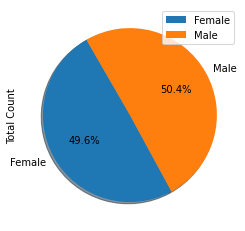

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot.pie(y='Total Count', startangle=120, shadow = True, autopct="%1.1f%%")


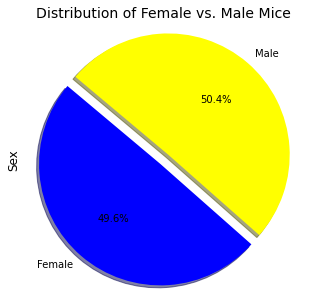

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplots
# Create labels & #List the values 
mouse_gender=mouse_gender.reset_index()
labels =  mouse_gender['Sex']
values = mouse_gender['Total Count']

#Set colors 
colors = ['blue', 'yellow']

#define how the pie will devide
explode = (0.1, 0)

#Create the pie chart
fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.pie(values, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Distribution of Female vs. Male Mice",fontsize = 14)
plt.ylabel('Sex', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
## Quartiles, Outliers and Boxplots

In [27]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin
#Start by getting the last (greatest) timepoint for each mouse 
max_tumor =  clean_mouse_df.groupby('Mouse ID')['Timepoint'].max()
max_tumor=max_tumor.reset_index()

#merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [28]:
# Create a list
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

In [29]:
#Put treatments into a list for for loop (and later for plot labels)
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatment_list:
    final_tumor_vol=merged_data.loc[merged_data['Drug Regimen']== drug, 'Tumor Volume (mm3)']
    
    #add subest
    tumor_vol_list.append(final_tumor_vol)
    
    #determine outliers using upper and lower bounds
    quartiles =final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol<lower_bound) | (final_tumor_vol>upper_bound)]
    print(f"{drug}'s potential outliers:{outliers.values}")

Capomulin's potential outliers:[]
Ramicane's potential outliers:[]
Infubinol's potential outliers:[36.3213458]
Ceftamin's potential outliers:[]


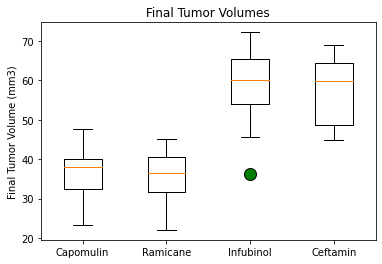

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops=dict(marker='o', markerfacecolor='green', markersize=12)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=flierprops)
plt.title('Final Tumor Volumes')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [39]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_regimen = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimen = drug_regimen.sort_values(["Timepoint"], ascending=True)
drug_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1391,q132,Infubinol,Female,1,30,0,45.0,0
195,i738,Capomulin,Female,23,20,0,45.0,0
205,a520,Ramicane,Male,13,21,0,45.0,0
1370,p438,Ceftamin,Female,11,26,0,45.0,0


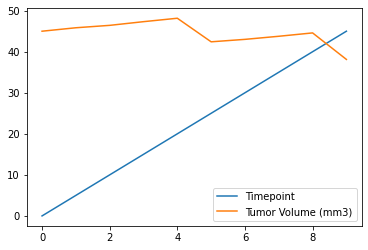

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vs_time=clean_mouse_df[clean_mouse_df["Mouse ID"].isin(['j119'])]
timepoint_tumor_data=tumor_vs_time[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
#reset index so x axis starts from 0
line_plot_df=timepoint_tumor_data.reset_index()
#create dataframe
line_plot=line_plot_df[['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]
lines=line_plot.plot.line()

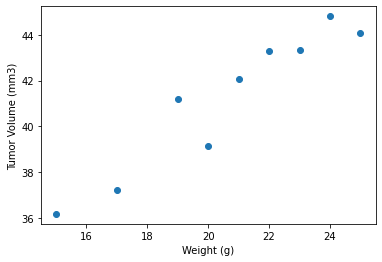

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scattr = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin"])]

# grouping by weight so it can be x axis and show correlation with mean tumor volume
cap_grouped_weight=cap_scattr.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
# convert back from grouped object to a dataframe and add reset index so Weight (g) can be references as x axis below
# as it is converted back to column from index
cap_grouped_plot=pd.DataFrame(cap_grouped_weight).reset_index()
# create and show the scater plot
# #using pandas
# cap_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

# with matplotlib
# set x and y values for this chart and reuse below
x_values = cap_grouped_plot['Weight (g)']
y_values = cap_grouped_plot['Tumor Volume (mm3)']
# create scatter plot
plt.scatter(x_values, y_values)
# add axis labels and show chart
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

The correlation between both factors is 0.95
The r-squared is: 0.9034966277438606


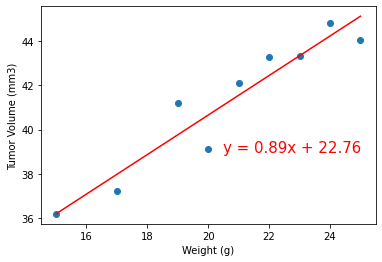

In [43]:
## Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_grouped_plot['Weight (g)'], cap_grouped_plot['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
# use line regress imported from above and assign output to variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# show r-squared
print(f"The r-squared is: {rvalue**2}")
# calculate regress values to create regression line
regress_values = x_values * slope + intercept
# line equat to display on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# recreate scatter plot from above
plt.scatter(x_values, y_values)
# plot the regression line
plt.plot(x_values,regress_values,"r-")
# add line equation at value coordinates 20.5,39
plt.annotate(line_eq,(20.5,39),fontsize=15,color="red")
# add axis labels and show chart 
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()